In [13]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import scipy
from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import pylab as py

import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("/content/Cleaned_GapMinder.csv")
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson,country,countrycode
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,49.624,0.000,1173.179,6.684,55.700,24.040,1.484,Afghanistan,AFG
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,9.000,636.341,7.699,51.400,46.720,1.484,Albania,ALB
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,2.000,590.510,4.849,50.500,65.220,0.420,Algeria,DZA
3,20423.174,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,3.689,1173.179,5.362,58.636,88.920,1.484,Andorra,AND
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,-2.000,172.999,14.555,75.700,56.700,1.484,Angola,AGO


# Test a Basic Linear Regression Model

In [3]:
data_centered = df.copy()
data_centered['incomeperperson'] = data_centered['incomeperperson'].subtract(data_centered['incomeperperson'].mean())
data_centered['employrate'] = data_centered['employrate'].subtract(data_centered['employrate'].mean())
data_centered['femaleemployrate'] = data_centered['femaleemployrate'].subtract(data_centered['femaleemployrate'].mean())

print ('Mean of', data_centered[['incomeperperson']].mean())
print ('Mean of', data_centered[['employrate']].mean())
print ('Mean of', data_centered[['femaleemployrate']].mean())

Mean of incomeperperson   -0.000
dtype: float64
Mean of employrate   0.000
dtype: float64
Mean of femaleemployrate   0.000
dtype: float64


#### Run scatterplot of internetuserate with centered incomeperperson

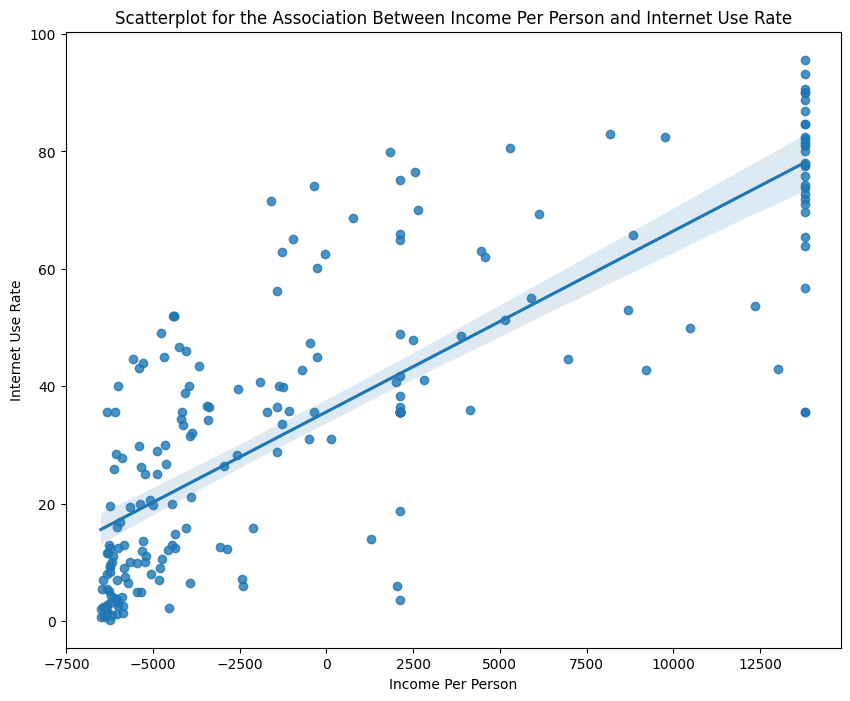

In [4]:
plt.figure(figsize = (10, 8))
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate')
plt.show()

#### OLS regression model for the association between income per person and internet use rate

In [5]:
reg1 = smf.ols('internetuserate ~ incomeperperson', data=data_centered).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     402.2
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           8.92e-51
Time:                        23:01:43   Log-Likelihood:                -885.09
No. Observations:                 213   AIC:                             1774.
Df Residuals:                     211   BIC:                             1781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.6327      1.062     33.541      0.000      33.539      37.727
incomeperperson     0.0031      0.000     20.055      0.000       0.003       0.003
==============================================================================
Omnibus:                        4.351   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                4.038
Skew:                           0.329   Prob(JB):                        0.133
Kurtosis:                       3.145   Cond. No.                     6.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results indicate that income per person is significantly and positively associated with internet use rate in a country according to the equation [internet use rate] = 	0.0031 * [income per person] + 35.6327. I suspect a linear regression line is not the best fit possible, the curve does appear to be logarithmic in shape; but for the sake of this demonstration a linear line is fine.

# Test a Multiple Regression Model
**OLS regression model for the association between income per person, employment rate, and female employment rate, and internet use rate**

In [8]:
reg2 = smf.ols('internetuserate ~ incomeperperson + employrate + femaleemployrate', data=data_centered).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.32e-51
Time:                        23:02:50   Log-Likelihood:                -877.58
No. Observations:                 213   AIC:                             1763.
Df Residuals:                     209   BIC:                             1777.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           35.6327      1.030     34.580      0.000      33.601      37.664
incomeperperson      0.0030      0.000     20.286      0.000       0.003       0.003
employrate          -0.7808      0.212     -3.686      0.000      -1.198      -0.363
femaleemployrate     0.3867      0.158      2.451      0.015       0.076       0.698
==============================================================================
Omnibus:                        0.917   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.802
Skew:                           0.150   Prob(JB):                        0.670
Kurtosis:                       3.011   Cond. No.                     6.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Quadratic (polynomial) regression analysis
**OLS regression model for the association between income per person and internet use rate**

In [9]:
reg3 = smf.ols('internetuserate ~ incomeperperson + I(incomeperperson**2)', data=data_centered).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           6.55e-52
Time:                        23:03:08   Log-Likelihood:                -879.17
No. Observations:                 213   AIC:                             1764.
Df Residuals:                     210   BIC:                             1774.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  40.1134      1.657     24.216      0.000      36.848      43.379
incomeperperson             0.0037      0.000     15.472      0.000       0.003       0.004
I(incomeperperson ** 2) -9.366e-08    2.7e-08     -3.466      0.001   -1.47e-07   -4.04e-08
==============================================================================
Omnibus:                        1.131   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                0.927
Skew:                           0.158   Prob(JB):                        0.629
Kurtosis:                       3.072   Cond. No.                     1.25e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

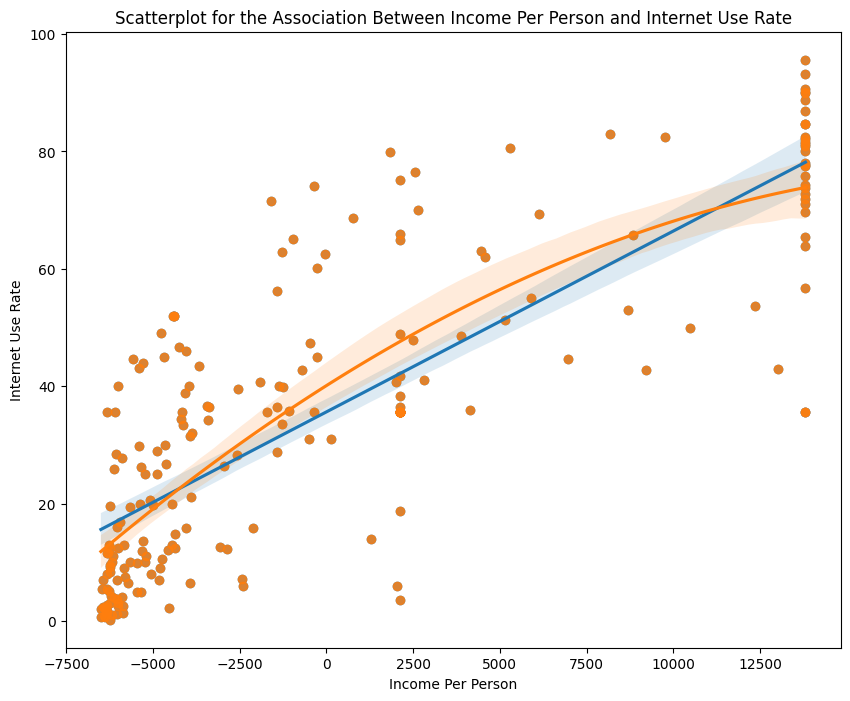

In [11]:
plt.figure(figsize = (10, 8))
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
scat2 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, order=2, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate')
plt.show()

## Q-Q plot for normality

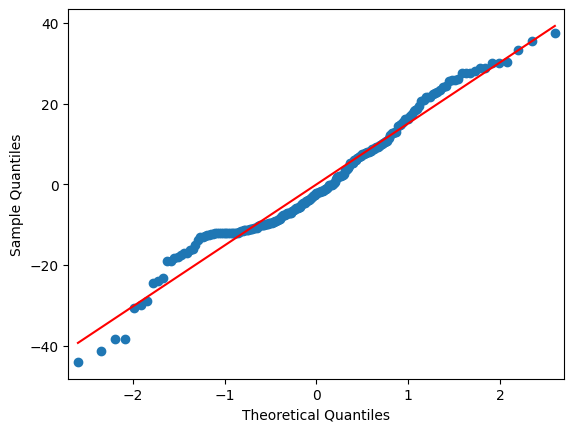

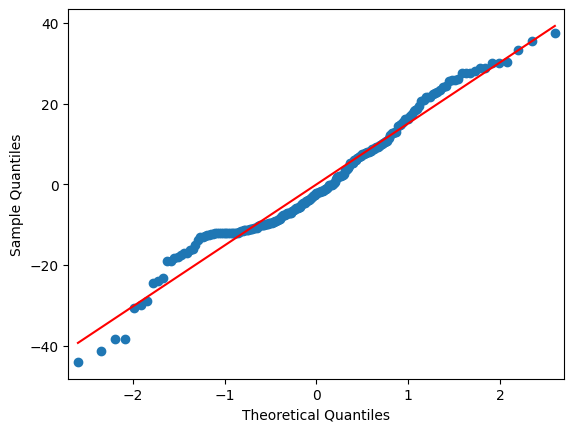

In [14]:
fig4 = sm.qqplot(reg3.resid, line='r')
fig4

## Simple plot of residuals

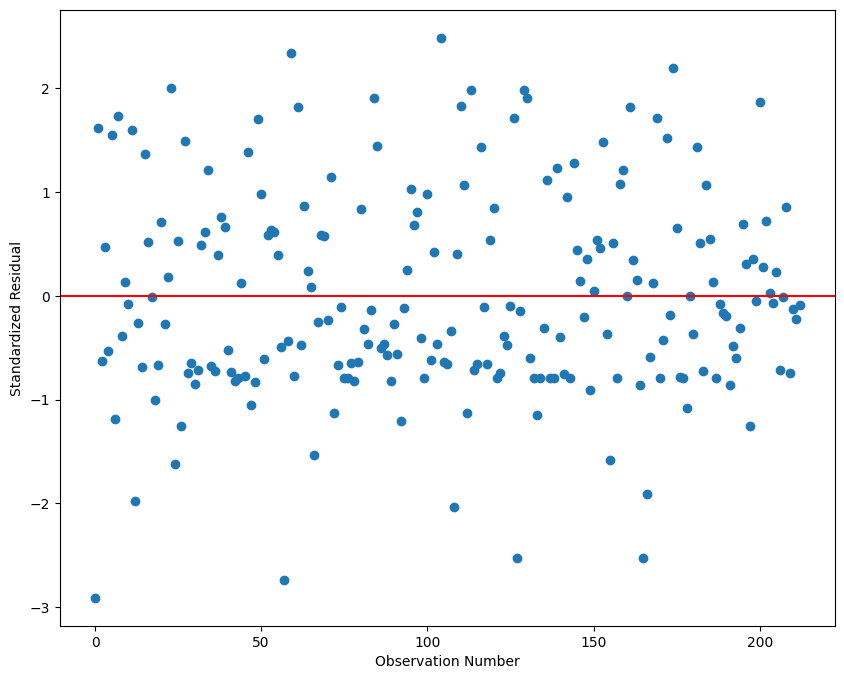

In [17]:
plt.figure(figsize = (10, 8))
stdres=pd.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
plt.show()

## Additional regression diagnostic plots

eval_env: 1


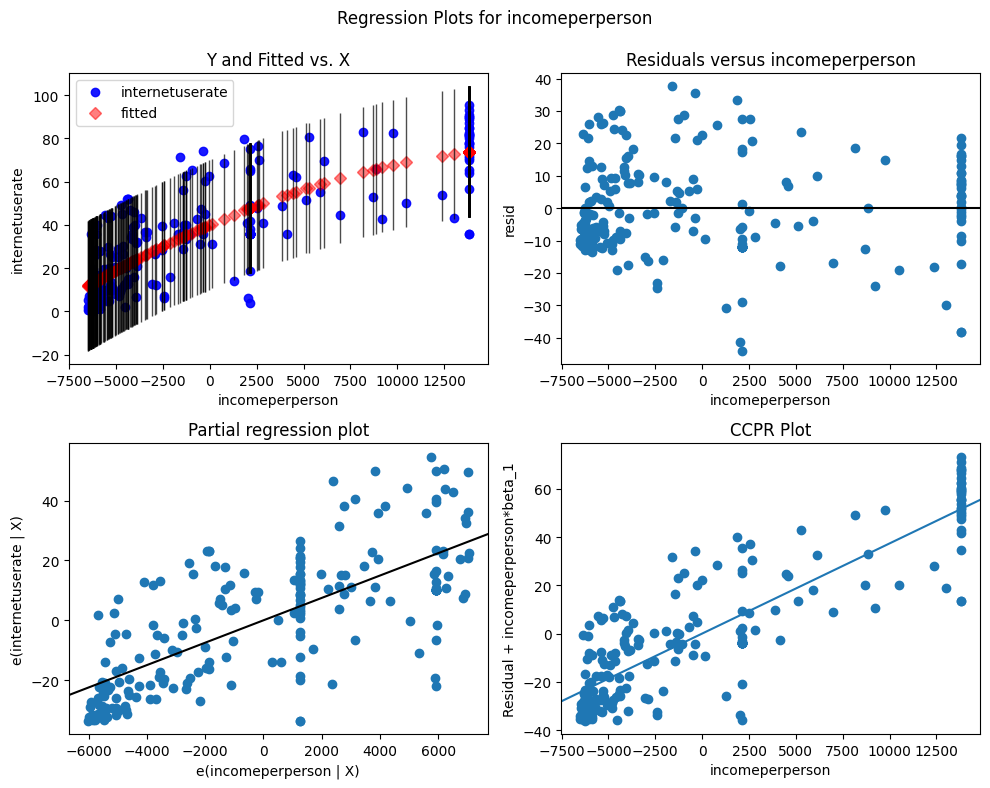

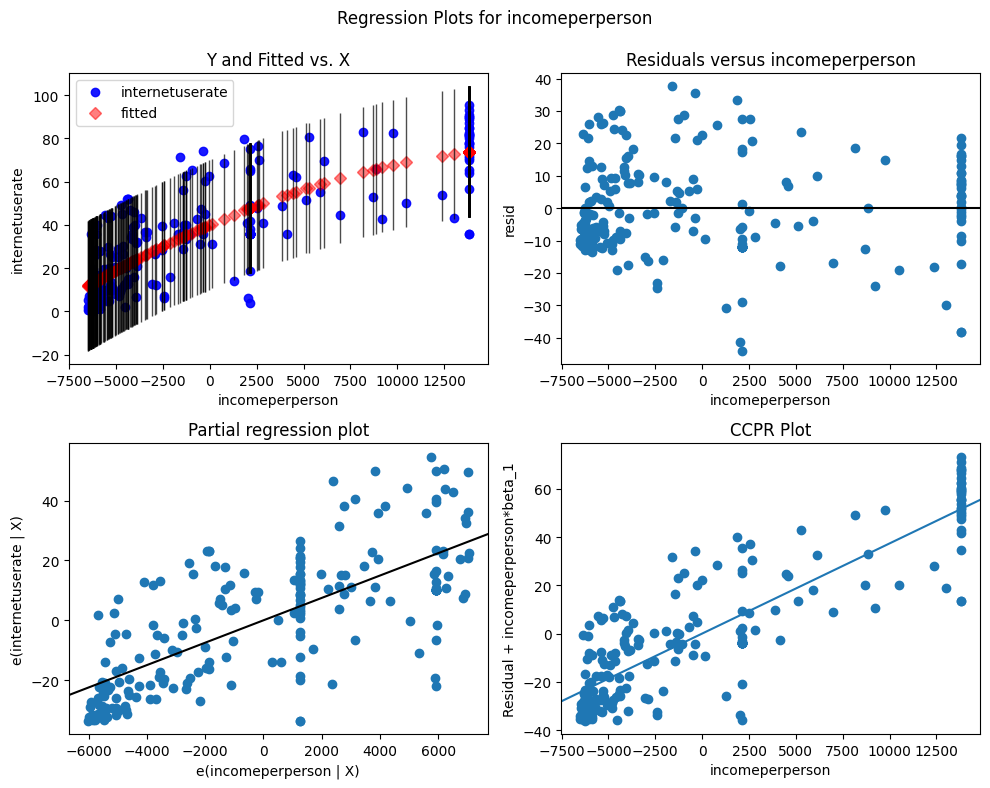

In [18]:
fig2 = plt.figure(figsize = (10, 8))
fig2 = sm.graphics.plot_regress_exog(reg3, "incomeperperson", fig=fig2)
fig2

## Leverage plot

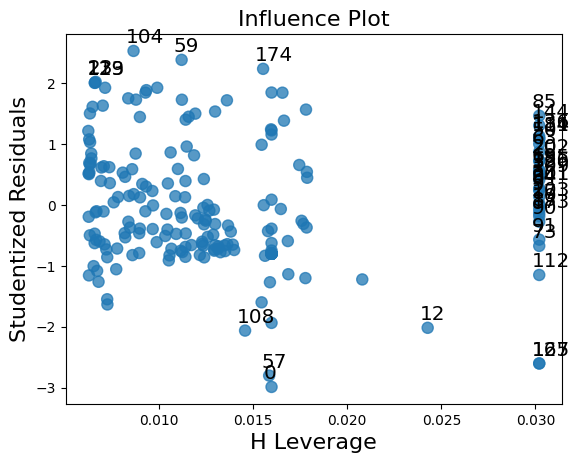

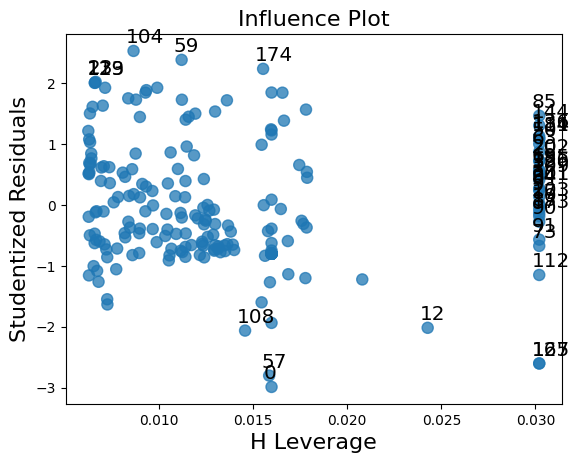

In [22]:
fig3 = sm.graphics.influence_plot(reg3, size=8)
fig3

The analysis shows that internetuserate is significantly correlated with incomeperperson (p-value = 0.000) and employrate (p-value = 0.000); however, femaleemployrate is just outside the 0.05 range of significane with a p-value of 0.078. With a coefficient of 0.002, incomeperperson is slightly positively correlated with internetuserate while employrate is strongly negatively correlated, with a coefficient of -0.869. This supports my hypothesis that internetuserate could be predicted based upon incomeperperson and employrate, but it does not support my hypothesis that femaleemployrate would be a better predictor than employrate.

When I added polityscore to my analysis, it exhibited a p-value out of range of significance, but it also threw several other variables into higher (but still significant) p-value ranges. This suggests that polityscore is a confounding variable and is associated with the others, but adding it to my analysis adds no new information.

Examining the plots posted above indicates that a curved line is a much better fit for the relationship between incomeperperson and internetuserate. However, I do not believe a 2-degree polynomial line is the best; the data appears to match a logarithmic line better. Indeed, the Q-Q plot does show that the actual data is higher than predicted at the extremes and lower than predicted in the middle. This would match my theory that a logarithmic line would be a better fit. The plot of residuals is encouraging that no data points fall outside 3 standard deviations of the mean, however I am concerned that so many fall within 2-3 deviations. I attribute this to the poor fit of the polynomial line as compared to a logarithmic line. The regression plots and the influence plot show an alarming point (labled 109 in the influence plot) which is an extreme outlier in terms of both residual value and influence. This point shows up again in the plot Residuals versus incomeperperson and the Partial regression plot. I must examine what this point is and possibly exclude it from the rest of my analysis.

## Test a Logistic Regression Model

In [24]:
binarydata = df.copy()

def internetgrp (row):
    if row['internetuserate'] < df['internetuserate'].median():
        return 0
    else:
        return 1

binarydata['internetuserate'] = binarydata.apply(lambda row: internetgrp(row), axis=1)

## Perform logistic regression with income per person

In [25]:
lreg1 = smf.logit(formula = 'internetuserate ~ incomeperperson', data = binarydata).fit()
lreg1.summary()

Optimization terminated successfully.
         Current function value: 0.341277
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internetuserate   No. Observations:                  213
Model:                          Logit   Df Residuals:                      211
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.5067
Time:                        23:16:59   Log-Likelihood:                -72.692
converged:                       True   LL-Null:                       -147.36
Covariance Type:            nonrobust   LLR p-value:                 2.431e-34
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3805      0.335     -7.113      0.000      -3.036      -1.725
incomeperperson     0.0006   7.94e-05      7.092      0.000       0.000       0.001
===================================================================================
"""

### Calculate odds ratios

In [26]:
np.exp(lreg1.params)

Intercept         0.093
incomeperperson   1.001
dtype: float64

### Calculate odd ratios with 95% confidence intervals

In [27]:
params = lreg1.params
conf = lreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.048,0.178,0.093
incomeperperson,1.000,1.001,1.001


### Perform logistic regression with income per person and employment rate

In [28]:
lreg2 = smf.logit(formula = 'internetuserate ~ incomeperperson + employrate', data = binarydata).fit()
print(lreg2.summary())

Optimization terminated successfully.
         Current function value: 0.319738
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        internetuserate   No. Observations:                  213
Model:                          Logit   Df Residuals:                      210
Method:                           MLE   Df Model:                            2
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.5378
Time:                        23:17:53   Log-Likelihood:                -68.104
converged:                       True   LL-Null:                       -147.36
Covariance Type:            nonrobust   LLR p-value:                 3.813e-35
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.8046      1.430      1.262      0.207      -0.999       4.608
incomeperperso

My first examination was of internet use rate versus income per person. I found that the relationship is highly significant, with a p-value of 0.000. The odds ratio came out to be 1.001, which indicates that as income per person goes up, so will the internet use rate. However, the odds ratio is very close to 1, so the correlation is not particularly strong. The 95% confidence interval for this odds ratio is 1.000403 to 1.000813, which is a fairly small interval, telling us that our odds ratio is most likely accurate to several decimal places.

Next, I brought employment rate into the analysis as a second explanatory variable. Because it did not change the statistics of income per person much, I can be confident that it is not a confounding variable. With this additional variable, the p-value of income per person stayed the same, at 0.000, and the p-value of employment rate is 0.004. Because this is below our limit of 0.05, both variables are significant. The odds ratio of income per person is now 1.0005, and the odds ratio for employment rate is 0.944. Increasing income per person leads to increasing internet usage, but decreasing employment rates will also increase internet use. Too much Facebook, perhaps? The confidence intervals for these odds ratios are similarly as small as the single-variate results.

These results match my previous analysis, that increasing income per person will lead to an increase in the internet use rate, but conversely increasing the employment rate leads to a decrease in the internet use rate.